In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  # the plot will appear inside the notebook cell output (visualization output will lie inside notebook)

# Load CSV
data = pd.read_csv('pregnency_data_dates_updated.csv')  # Update path if needed, e.g., 'C:/Users/YourName/Documents/pregnancy_data.csv'
print(data.head())  # To View first 5 rows
print("\n") # line break
print(data.info())  # Check data types and missing values

   Visit_Number  Month  Systolic_BP  Diastolic_BP  Weight_KG  Pulse_Rate  \
0             1      1          139            70       86.0          70   
1             2      1          131            73       86.5          85   
2             3      2          128            66       87.8          82   
3             4      3          132            70       91.9          94   
4             5      5          124            71       92.8          89   

  date_of_visit  
0    04-01-2025  
1    25-01-2025  
2    08-02-2025  
3    25-04-2025  
4    16-05-2025  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Visit_Number   8 non-null      int64  
 1   Month          8 non-null      int64  
 2   Systolic_BP    8 non-null      int64  
 3   Diastolic_BP   8 non-null      int64  
 4   Weight_KG      8 non-null      float64
 5   Pulse_Rate     8 non

In [14]:
# Convert to datetime with explicit format
data['date_of_visit'] = pd.to_datetime(data['date_of_visit'], format='%m-%d-%y')

# To check whether any null value is present
print(data.isnull().sum())  
print("\n")
print(data.head())  # View first 5 rows
print("\n")
print(data.info())  # Check data types and missing values

Visit_Number     0
Month            0
Systolic_BP      0
Diastolic_BP     0
Weight_KG        0
Pulse_Rate       0
date_of_visit    0
dtype: int64


   Visit_Number  Month  Systolic_BP  Diastolic_BP  Weight_KG  Pulse_Rate  \
0             1      1        139.0          70.0       86.0        70.0   
1             2      1        131.0          73.0       86.5        85.0   
2             3      2        128.0          66.0       87.8        82.0   
3             4      3        132.0          70.0       91.9        94.0   
4             5      5        124.0          71.0       92.8        89.0   

  date_of_visit  
0    2025-01-04  
1    2025-01-25  
2    2025-02-08  
3    2025-04-25  
4    2025-05-16  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Visit_Number   8 non-null      int64         
 1   Month          8 non-null  

In [3]:
# To view Summary of the statistics
#  count, mean, std deviation, min, max, 25% → First Quartile (Q1), 50% → Second Quartile (Q2), 75% → Third Quartile (Q3)

print(data.describe()) 

       Visit_Number     Month  Systolic_BP  Diastolic_BP  Weight_KG  \
count       8.00000  8.000000     8.000000      8.000000   8.000000   
mean        4.50000  4.250000   127.125000     70.750000  91.612500   
std         2.44949  2.866058     7.019107      4.334249   4.333075   
min         1.00000  1.000000   117.000000     66.000000  86.000000   
25%         2.75000  1.750000   123.000000     68.500000  87.475000   
50%         4.50000  4.000000   127.000000     70.000000  92.350000   
75%         6.25000  7.000000   131.250000     71.500000  95.500000   
max         8.00000  8.000000   139.000000     80.000000  96.700000   

       Pulse_Rate  
count    8.000000  
mean    86.750000  
std      8.276473  
min     70.000000  
25%     84.250000  
50%     88.000000  
75%     91.000000  
max     97.000000  


In [4]:
# Replaces the integer values int datatype the of Systolic_BP into float datatype 
# Outliers in Systolic_BP Diastolic_BP Pulse_Rate will be converted as float by creting the mean() to convet the outliers
data['Systolic_BP'] = data['Systolic_BP'].astype(float)
data['Diastolic_BP'] = data['Diastolic_BP'].astype(float)
data['Pulse_Rate'] = data['Pulse_Rate'].astype(float)

# Replace outliers with column mean 
data.loc[data['Systolic_BP'] > 180, 'Systolic_BP'] = data['Systolic_BP'].mean()
data.loc[data['Diastolic_BP'] > 110, 'Diastolic_BP'] = data['Diastolic_BP'].mean()
data.loc[data['Pulse_Rate'] > 100, 'Pulse_Rate'] = data['Pulse_Rate'].mean()

# Re-check summary statistics
print(data.describe())

       Visit_Number     Month  Systolic_BP  Diastolic_BP  Weight_KG  \
count       8.00000  8.000000     8.000000      8.000000   8.000000   
mean        4.50000  4.250000   127.125000     70.750000  91.612500   
std         2.44949  2.866058     7.019107      4.334249   4.333075   
min         1.00000  1.000000   117.000000     66.000000  86.000000   
25%         2.75000  1.750000   123.000000     68.500000  87.475000   
50%         4.50000  4.000000   127.000000     70.000000  92.350000   
75%         6.25000  7.000000   131.250000     71.500000  95.500000   
max         8.00000  8.000000   139.000000     80.000000  96.700000   

       Pulse_Rate  
count    8.000000  
mean    86.750000  
std      8.276473  
min     70.000000  
25%     84.250000  
50%     88.000000  
75%     91.000000  
max     97.000000  


In [9]:
print(data.head()) # To view first five rows

   Visit_Number  Month  Systolic_BP  Diastolic_BP  Weight_KG  Pulse_Rate  \
0             1      1        139.0          70.0       86.0        70.0   
1             2      1        131.0          73.0       86.5        85.0   
2             3      2        128.0          66.0       87.8        82.0   
3             4      3        132.0          70.0       91.9        94.0   
4             5      5        124.0          71.0       92.8        89.0   

  date_of_visit  
0    04-01-2025  
1    25-01-2025  
2    08-02-2025  
3    25-04-2025  
4    16-05-2025  


In [15]:
print(data.tail()) # To view last five rows

   Visit_Number  Month  Systolic_BP  Diastolic_BP  Weight_KG  Pulse_Rate  \
3             4      3        132.0          70.0       91.9        94.0   
4             5      5        124.0          71.0       92.8        89.0   
5             6      7        120.0          80.0       95.8        97.0   
6             7      7        117.0          69.0       95.4        87.0   
7             8      8        126.0          67.0       96.7        90.0   

  date_of_visit  
3    2025-04-25  
4    2025-05-16  
5    2025-07-22  
6    2025-07-29  
7    2025-08-04  


In [28]:
data.to_csv('updated_latest.csv', index=False)  #It updates the dataset to new csv file 'updated_latest.csv'

In [29]:
# To find Corelation between two variables

print(data[['Systolic_BP', 'Month','Diastolic_BP', 'Weight_KG', 'Pulse_Rate']].corr())

# 1.0 → perfect correlation with itself (diagonal values)
#Closer to +1 → strong positive relationship (both increase together)
#Closer to -1 → strong negative relationship (one increases while the other decreases)
#Around 0 → little or no linear relationship

              Systolic_BP     Month  Diastolic_BP  Weight_KG  Pulse_Rate
Systolic_BP      1.000000 -0.804217     -0.247702  -0.779767   -0.641208
Month           -0.804217  1.000000      0.155252   0.977489    0.629344
Diastolic_BP    -0.247702  0.155252      1.000000   0.181988    0.432088
Weight_KG       -0.779767  0.977489      0.181988   1.000000    0.741820
Pulse_Rate      -0.641208  0.629344      0.432088   0.741820    1.000000


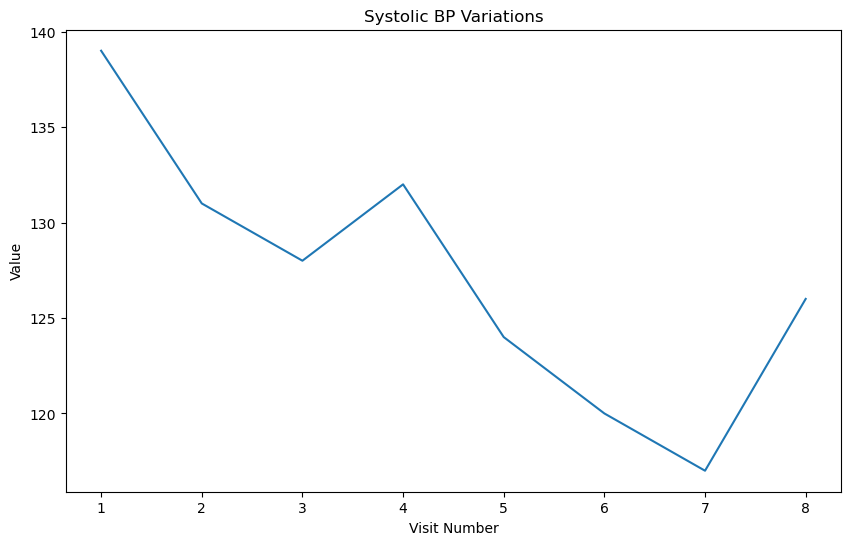

In [31]:
plt.figure(figsize=(10, 6)) # Plotting the dimension of the figure
plt.plot(data['Visit_Number'], data['Systolic_BP'], label='Systolic BP') # Plotting the X and Y axis with variables and label
plt.title('Systolic BP Variations') # plot Title
plt.xlabel('Visit Number') # Naming the X axis
plt.ylabel('Value') #Naming the Y axis
plt.legend() #displays the legend
plt.savefig('Systolic_BP_new.png') #It saves as a png
plt.show() #visualization output

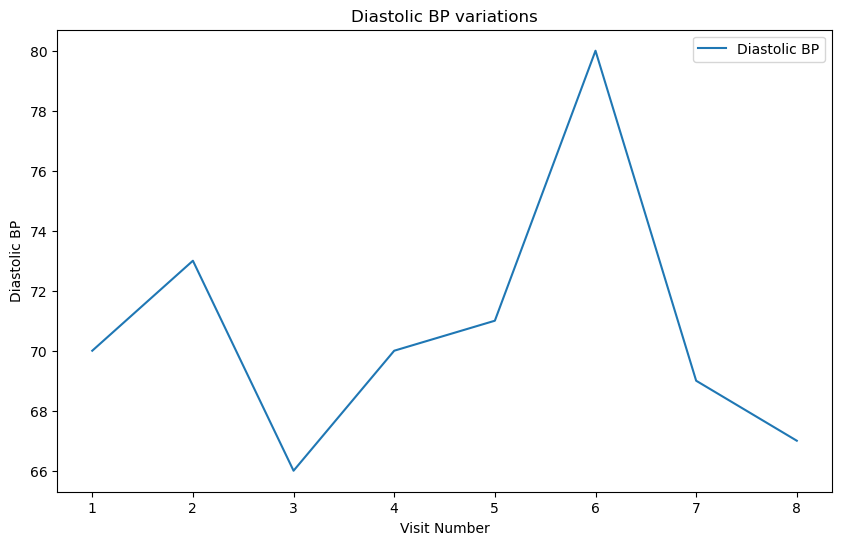

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(data['Visit_Number'], data['Diastolic_BP'], label='Diastolic BP')
plt.title('Diastolic BP variations')
plt.xlabel('Visit Number')
plt.ylabel('Diastolic BP')
plt.legend()
plt.savefig('Diastolic_BP_new.png')
plt.show()

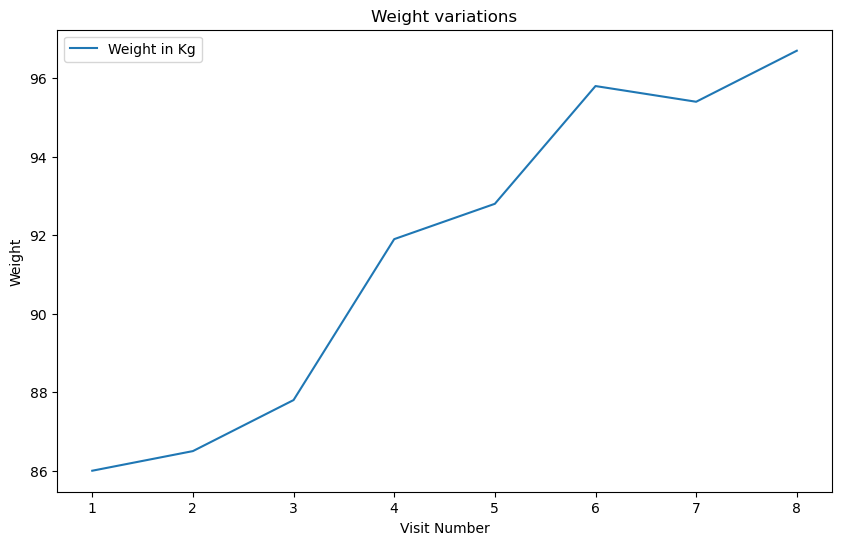

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(data['Visit_Number'], data['Weight_KG'], label='Weight in Kg')
plt.title('Weight variations')
plt.xlabel('Visit Number')
plt.ylabel('Weight')
plt.legend()
plt.savefig('weight_variations_new.png')
plt.show()

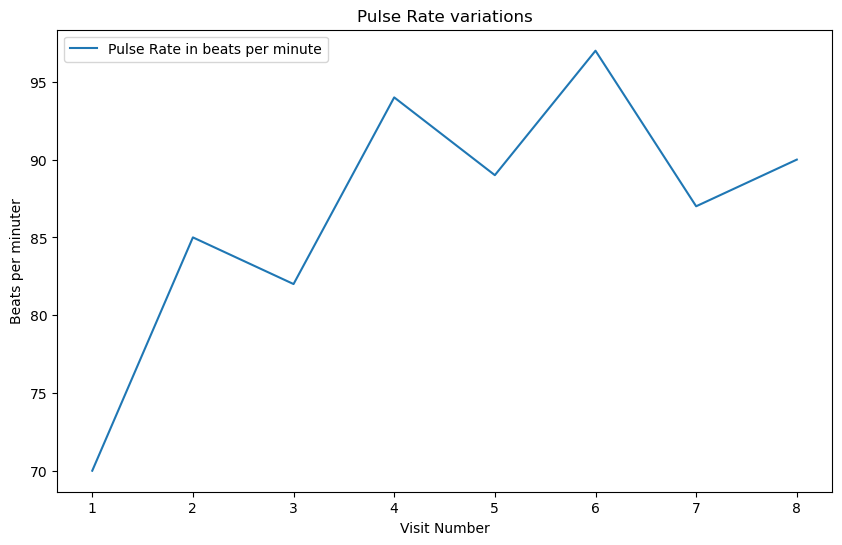

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(data['Visit_Number'], data['Pulse_Rate'], label='Pulse Rate in beats per minute')
plt.title('Pulse Rate variations')
plt.xlabel('Visit Number')
plt.ylabel('Beats per minuter')
plt.legend()
plt.savefig('Pulse_rate_variations_new.png')
plt.show()

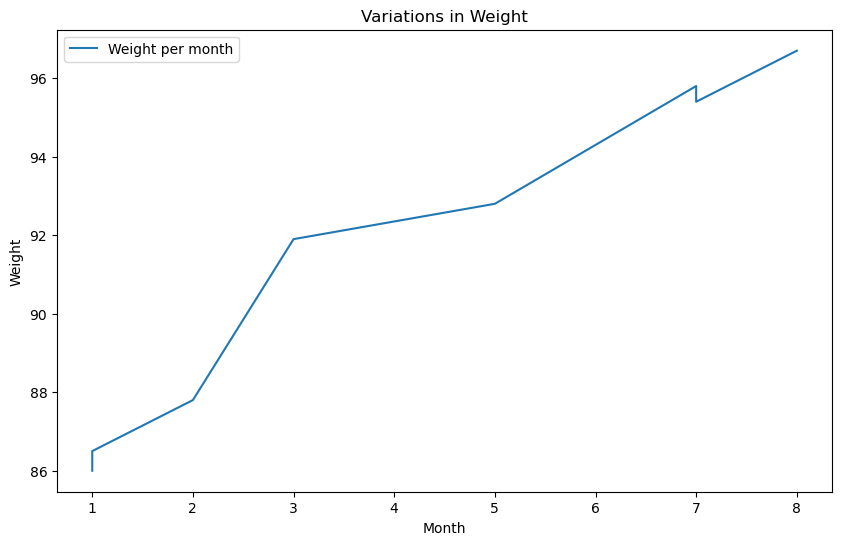

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(data['Month'], data['Weight_KG'], label='Weight per month')
plt.title('Variations in Weight')
plt.xlabel('Month')
plt.ylabel('Weight')
plt.legend()
plt.savefig('month_weight.png')
plt.show()

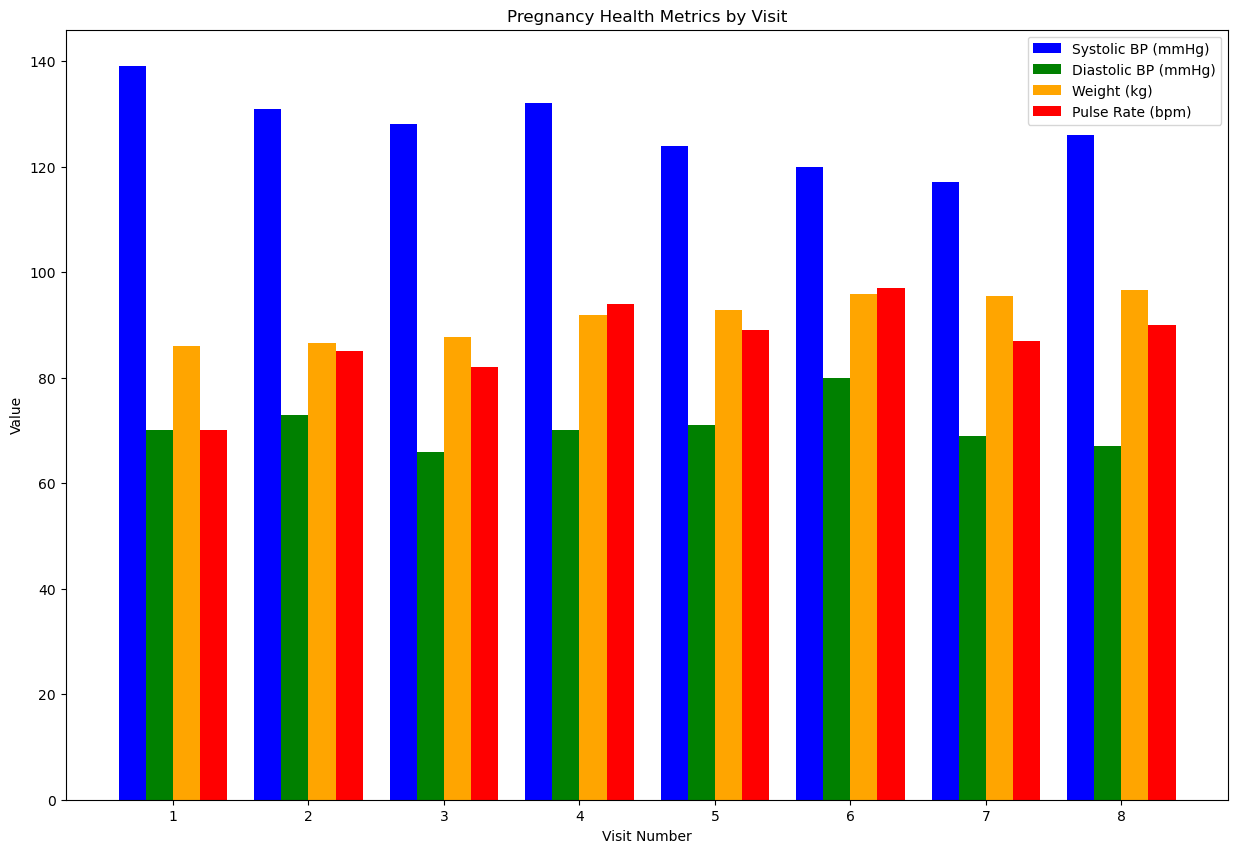

In [37]:

# Assuming data is your DataFrame with Visit_Number, Systolic_BP, Diastolic_BP, Weight_kg, Pulse_Rate
plt.figure(figsize=(15, 10))

# Plot bars for each metric
bar_width = 0.2
index = range(len(data))  # Index for each visit (0 to 23 or your total rows)

#it iterates data and colours bar by bar with specified variables , #firstbar #secondbar #thirdbar #fourthbar
plt.bar(index, data['Systolic_BP'], bar_width, label='Systolic BP (mmHg)', color='blue')
plt.bar([i + bar_width for i in index], data['Diastolic_BP'], bar_width, label='Diastolic BP (mmHg)', color='green')
plt.bar([i + 2 * bar_width for i in index], data['Weight_KG'], bar_width, label='Weight (kg)', color='orange')
plt.bar([i + 3 * bar_width for i in index], data['Pulse_Rate'], bar_width, label='Pulse Rate (bpm)', color='red')

# Customize the plot
plt.xlabel('Visit Number')
plt.ylabel('Value')
plt.title('Pregnancy Health Metrics by Visit')
plt.xticks([i + 1.5 * bar_width for i in index], data['Visit_Number']) #it places the visit number even on the bars 
plt.legend() # displays the legend
plt.savefig('health_metrics_bar.png')
plt.show()